### 1. EDA (Exploratory  Data Analysis):
                
                a) Data Understanding
                b) Cleaning
                c) Imputation
                d) Checking Skewness
                e) Conversion of data types and time format
                f) Creating dummy variables
                g) Visualisation
                
### 2. Test-Train split:

### 3. Feature Scaling:

### 4. Model Building:
                a) Running the Training Model
                b) Feature Selection Using RFE
                c) Assessing the model with StatsModels
                d)  Metrics beyond simply accuracy
                e) Plotting the ROC Curve
                f) Finding Optimal Cutoff Point
                g) Precision and Recall
                h) Making Predictions on the Test set

## 1.EDA (Exploratory Data Analysis)

### a) Data Understanding:

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
# Reading the data set

lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Lead Origin,Lead Source,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Last Notable Activity        

In [3]:
lead_data.shape

(9240, 37)

We have 9240 rows and 37 columns

In [4]:
lead_data.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are some null values. Let's find them.

In [5]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### b) Cleaning:

In [6]:
# Check for the 'Select' using value_counts of all the categorical variables

lead_data[['Lead Origin','Lead Source','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','City','Last Notable Activity']].apply(lambda x:x.value_counts()).T.stack()

Lead Origin                                    API                                                  3580.0
                                               Landing Page Submission                              4886.0
                                               Lead Add Form                                         718.0
                                               Lead Import                                            55.0
                                               Quick Add Form                                          1.0
Lead Source                                    Click2call                                              4.0
                                               Direct Traffic                                       2543.0
                                               Facebook                                               55.0
                                               Google                                               2868.0
                                     

Specialisation, Lead Profile, City, How did you hear about X Education are columns with 'Select'.

In [7]:
# Replacing 'Select' with Nan value

lead_data = lead_data.replace('Select', np.NaN)

In [8]:
# Check for the 'Select' using value_counts of all the categorical variables

lead_data[['Specialization','How did you hear about X Education','Lead Profile','City']].apply(lambda x:x.value_counts()).T.stack()

Specialization                      Banking, Investment And Insurance     338.0
                                    Business Administration               403.0
                                    E-Business                             57.0
                                    E-COMMERCE                            112.0
                                    Finance Management                    976.0
                                    Healthcare Management                 159.0
                                    Hospitality Management                114.0
                                    Human Resource Management             848.0
                                    IT Projects Management                366.0
                                    International Business                178.0
                                    Marketing Management                  838.0
                                    Media and Advertising                 203.0
                                    Oper

Hence 'select' has been replaced.

In [9]:
# Finding the missing values 

lead_data_null = lead_data.isnull().sum()
lead_data_null[lead_data_null>0].sort_values(ascending = False).head(20)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Asymmetrique Activity Score                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
dtype: int64

In [10]:
# To show the actual mean/percentage of missing values from the columns.

lead_data_null_perc = 100*(lead_data.isnull().mean())
lead_data_null_perc[lead_data_null_perc>0].sort_values(ascending = False).head(20)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Activity Score                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

We can see the percentages of the missing values. Let's drop the columns having missing percentage more than 40 percent.

In [11]:
# Dropping the missing values more than 40 percent

lead_data = lead_data.loc[: ,lead_data.isnull().mean() < 0.40]

100*(lead_data.isnull().mean())

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

### c) Imputation:

Before imputation of continuos variables let's check for outliers and cap them.

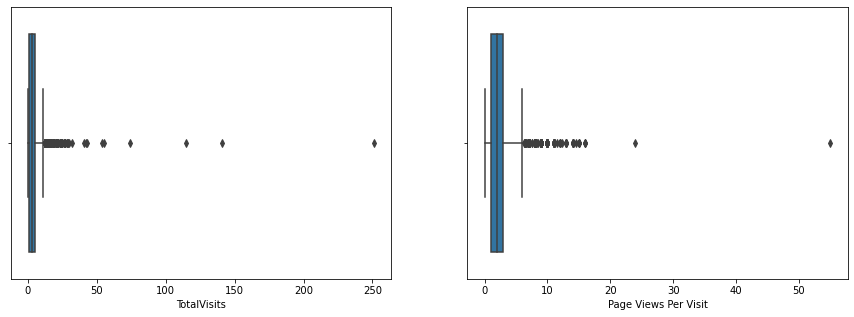

In [12]:
# Plotting the box-plots for the continuos variables

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(lead_data['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(lead_data['Page Views Per Visit'])
plt.show()

We can see that there are significant outliers. So, let's cap them to their 99th  percentile.

In [13]:
# CAPPING THE UPPER RANGE OF OUTLIERS FOR 'TotalVisits','Page Views Per Visit'.

continuos_features = ['TotalVisits','Page Views Per Visit']
for i in continuos_features:
    q1 = lead_data[i].quantile(0.05)
    q4 = lead_data[i].quantile(0.99)
    lead_data[i][lead_data[i] <= q1] = q1
    lead_data[i][lead_data[i] >= q4] = q4

In [14]:
# Imputing continuos variables with mean value for the low missing percentages

continuos_features = ['TotalVisits','Page Views Per Visit']
for i in enumerate(continuos_features):
    lead_data[i[1]] = lead_data[i[1]].fillna(lead_data[i[1]].mean())

In [15]:
# Imputing categorical variables with mode value for the low missing percentages

categorical_features = ['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City']
for i in enumerate(categorical_features):
    lead_data[i[1]] = lead_data[i[1]].fillna(lead_data[i[1]].mode()[0])

In [16]:
lead_data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [17]:
lead_data.shape

(9240, 30)

In [18]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [19]:
# Checking the value_counts of all the categorical variables

lead_data[['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City','Last Notable Activity']].apply(lambda x:(((x.value_counts())*100)/9240)).T.stack()

Lead Origin                                    API                                                  38.744589
                                               Landing Page Submission                              52.878788
                                               Lead Add Form                                         7.770563
                                               Lead Import                                           0.595238
                                               Quick Add Form                                        0.010823
Lead Source                                    Click2call                                            0.043290
                                               Direct Traffic                                       27.521645
                                               Facebook                                              0.595238
                                               Google                                               31.428571
          

###  d) Checking Skewness:

In [20]:
# Checking the skewness of the column 'Last Activity '

((lead_data['Lead Origin'].value_counts()) / 9240)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

Since it is skewed we perform bucketing.

In [21]:
# Bucketing/Binning

lead_data['Lead Origin'] = lead_data['Lead Origin'].apply(lambda x: 'Other' if (x!='Landing Page Submission') & (x!='API') else x)
lead_data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Other                       774
Name: Lead Origin, dtype: int64

In [22]:
# Checking the skewness of the column 'Last Activity '

((lead_data['Lead Source'].value_counts()) / 9240)*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Live Chat             0.021645
Social Media          0.021645
Pay per Click Ads     0.010823
testone               0.010823
youtubechannel        0.010823
NC_EDM                0.010823
blog                  0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
Name: Lead Source, dtype: float64

Since it is skewed we perform bucketing.

In [23]:
# Bucketing/Binning

lead_data['Lead Source'] = lead_data['Lead Source'].apply(lambda x: 'Other' if (x!='Google') & (x!='Direct Traffic') & (x!= 'Olark Chat') else x)
lead_data['Lead Source'].value_counts()

Google            2904
Direct Traffic    2543
Other             2038
Olark Chat        1755
Name: Lead Source, dtype: int64

In [24]:
# Checking the skewness of the column 'Last Activity '

((lead_data['Last Activity'].value_counts()) / 9240)*100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

Since it is skewed we perform bucketing.

In [25]:
# Bucketing/Binning

lead_data['Last Activity'] = lead_data['Last Activity'].apply(lambda x: 'Other' if (x!='Email Opened') & (x!='SMS Sent') else x)
lead_data['Last Activity'].value_counts()

Email Opened    3540
Other           2955
SMS Sent        2745
Name: Last Activity, dtype: int64

In [26]:
# Checking the skewness of the column 'Specialization'

((lead_data['Specialization'].value_counts()) / 9240)*100

Finance Management                   47.142857
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In the 'specialization' column 47% of data is in 'Finance Management' and other 53% is explained by other. So, we replace the other specializations with 'Other'.

In [27]:
# Bucketing/Binning

lead_data['Specialization'] = lead_data['Specialization'].apply(lambda x: 'Other' if (x!='Finance Management') else x)
lead_data['Specialization'].value_counts()

Other                 4884
Finance Management    4356
Name: Specialization, dtype: int64

In [28]:
# checking skewness for the column 'Tags'

((lead_data['Tags'].value_counts()) / 9240)*100

Will revert after reading the email                  58.712121
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

In the 'Tags' column 58% of data is in 'Will revert after reading the email' and other 42% is explained by other. So, we replace the other Tags with 'Other'.

In [29]:
# Bucketing/Binning

lead_data['Tags'] = lead_data['Tags'].apply(lambda x: 'Other' if (x!='Will revert after reading the email') else x)
lead_data['Tags'].value_counts()

Will revert after reading the email    5425
Other                                  3815
Name: Tags, dtype: int64

In [30]:
# Checking the skewness of the column 'Country'

((lead_data['Country'].value_counts()) / 9240)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Kuwait                   0.043290
Nigeria                  0.043290
Canada                   0.043290
Germany                  0.043290
Sweden                   0.032468
Uganda                   0.021645
Italy                    0.021645
Philippines              0.021645
Asia/Pacific Region      0.021645
Belgium                  0.021645
China                    0.021645
Bangladesh               0.021645
Ghana                    0.021645
Netherlands              0.021645
Tanzania                 0.010823
Kenya         

In [31]:
# checking skewness for the column 'What is your current occupation'

((lead_data['What is your current occupation'].value_counts()) / 9240)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [32]:
# checking skewness for the column 'What matters most to you in choosing a course'

((lead_data['What matters most to you in choosing a course'].value_counts()) / 9240)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [33]:
# checking skewness for the column 'City'

((lead_data['City'].value_counts()) / 9240)*100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [34]:
# checking skewness for the column 'What matters most to you in choosing a course'

lead_data['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [35]:
lead_data['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [36]:
lead_data['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [37]:
lead_data['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [38]:
lead_data['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

We can see from above cells [29]-[37] the columns are highly skewed. So, we drop those columns.

In [39]:
lead_data.drop(columns = ['Country','What is your current occupation','What matters most to you in choosing a course','City','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque','Get updates on DM Content'],axis = 1,inplace = True)

In [40]:
# checking skewness for the column 'Last Notable Activity'

((lead_data['Last Notable Activity'].value_counts()) / 9240)*100



Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
View in browser link Clicked     0.010823
Resubscribed to emails           0.010823
Name: Last Notable Activity, dtype: float64

Since it is skewed we perform bucketing.

In [41]:
# Bucketing/Binning

lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].apply(lambda x: 'Other' if (x!='Modified') & (x!='Email Opened') & (x!='SMS Sent') else x)
lead_data['Last Notable Activity'].value_counts()

Modified        3407
Email Opened    2827
SMS Sent        2172
Other            834
Name: Last Notable Activity, dtype: int64

In [42]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Other,Finance Management,No,No,No,No,No,No,Other,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Other,No,No,0,5.0,674,2.5,Email Opened,Finance Management,No,No,No,No,No,No,Other,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Other,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Other,Other,No,No,No,No,No,No,Other,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Other,Finance Management,No,No,No,No,No,No,Will revert after reading the email,No,Modified


### e) Conversion of data types and time format :

In [43]:
# Converting datatypes

lead_data['TotalVisits'] = lead_data['TotalVisits'].astype(dtype = 'int64')
lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].astype(dtype = 'int64')

In [44]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Prospect ID                             9240 non-null   object
 1   Lead Number                             9240 non-null   int64 
 2   Lead Origin                             9240 non-null   object
 3   Lead Source                             9240 non-null   object
 4   Do Not Email                            9240 non-null   object
 5   Do Not Call                             9240 non-null   object
 6   Converted                               9240 non-null   int64 
 7   TotalVisits                             9240 non-null   int64 
 8   Total Time Spent on Website             9240 non-null   int64 
 9   Page Views Per Visit                    9240 non-null   int64 
 10  Last Activity                           9240 non-null   object
 11  Spec

In [45]:
# 'Total Time Spent on Website' is in seconds. let's convert it into minutes.

lead_data['Total Time Spent on Website'] = round(lead_data['Total Time Spent on Website'] / 60,0).astype(dtype = 'int64')

In [46]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0,0,0,Other,Finance Management,No,No,No,No,No,No,Other,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Other,No,No,0,5,11,2,Email Opened,Finance Management,No,No,No,No,No,No,Other,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2,26,2,Email Opened,Other,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1,5,1,Other,Other,No,No,No,No,No,No,Other,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2,24,1,Other,Finance Management,No,No,No,No,No,No,Will revert after reading the email,No,Modified


### f) Creating dummy variables :

#### For categorical variables with multiple levels, create dummy variables (one-hot encoded)

In [47]:
# Creating a dummy variable for some of the categorical variables.

dummy1 = pd.get_dummies(lead_data[['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Specialization','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Tags','A free copy of Mastering The Interview','Last Notable Activity']])

# Adding the results to the master dataframe

lead_data = pd.concat([lead_data, dummy1], axis=1)

In [48]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Email Opened,Last Activity_Other,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Other,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Tags_Other,Tags_Will revert after reading the email,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0,0,0,Other,Finance Management,No,No,No,No,No,No,Other,No,Modified,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Other,No,No,0,5,11,2,Email Opened,Finance Management,No,No,No,No,No,No,Other,No,Email Opened,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2,26,2,Email Opened,Other,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1,5,1,Other,Other,No,No,No,No,No,No,Other,No,Modified,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2,24,1,Other,Finance Management,No,No,No,No,No,No,Will revert after reading the email,No,Modified,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0


In [49]:
# Dropping the repeated columns and unnecessary skewed columns

lead_data.drop(columns = ['Lead Origin','Lead Source','Do Not Call','Do Not Email','Do Not Call_Yes','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Last Activity','Specialization','Search_Yes','Newspaper Article_Yes','X Education Forums_Yes','Newspaper_Yes','Digital Advertisement_Yes','Through Recommendations_Yes','Tags','Last Notable Activity','Lead Origin_Other','Last Notable Activity_Other'],axis = 1,inplace = True)

In [50]:
lead_data.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Last Activity_Email Opened,Last Activity_Other,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Other,Search_No,Newspaper Article_No,X Education Forums_No,Newspaper_No,Digital Advertisement_No,Through Recommendations_No,Tags_Other,Tags_Will revert after reading the email,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5,11,2,1,0,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,1,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2,26,2,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1,5,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1,0,1,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2,24,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,1,1,0,0,1,0


In [51]:
lead_data.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Converted                                     0
TotalVisits                                   0
Total Time Spent on Website                   0
Page Views Per Visit                          0
Lead Origin_API                               0
Lead Origin_Landing Page Submission           0
Lead Source_Direct Traffic                    0
Lead Source_Google                            0
Lead Source_Olark Chat                        0
Lead Source_Other                             0
Do Not Email_No                               0
Do Not Email_Yes                              0
Do Not Call_No                                0
Last Activity_Email Opened                    0
Last Activity_Other                           0
Last Activity_SMS Sent                        0
Specialization_Finance Management             0
Specialization_Other                          0
Search_No                               

### g) Visualisation :

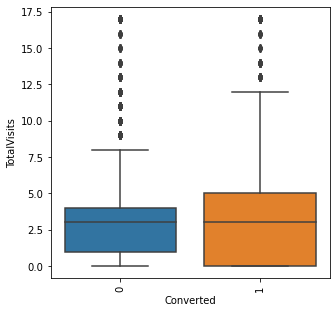

In [52]:
fig = plt.gcf()
fig.set_size_inches(5, 5)
z = sns.boxplot(x='Converted',y="TotalVisits", data=lead_data,orient = 'v')
z.set_xticklabels(z.get_xticklabels(),rotation=90)
plt.show()


People who have visited more are more likely to get converted. 

[Text(0, 0, '0'), Text(1, 0, '1')]

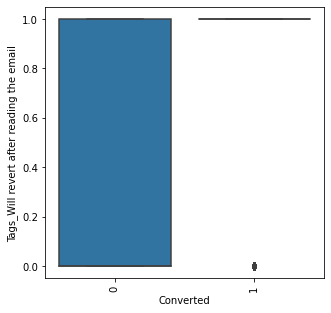

In [53]:
fig = plt.gcf()
fig.set_size_inches(5, 5)
z = sns.boxplot(x='Converted',y='Tags_Will revert after reading the email', data=lead_data,orient = 'v')
z.set_xticklabels(z.get_xticklabels(),rotation=90)

[Text(0, 0, '0'), Text(1, 0, '1')]

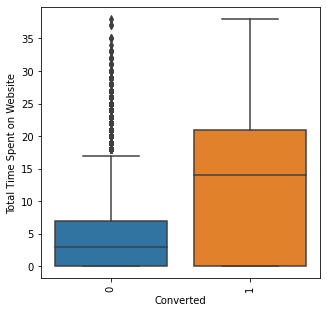

In [54]:
fig = plt.gcf()
fig.set_size_inches(5, 5)
z = sns.boxplot(x='Converted',y='Total Time Spent on Website', data=lead_data,orient = 'v')
z.set_xticklabels(z.get_xticklabels(),rotation=90)

People who spend more time on the website are more likely to get converted.

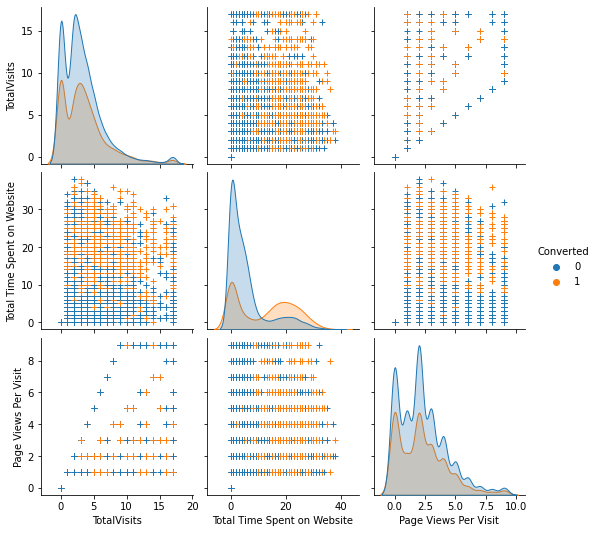

In [55]:
sns.pairplot(
    lead_data,
    x_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'],
    y_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'],
    hue = 'Converted',
    plot_kws=dict(marker="+", linewidth=1)
)

We can infer that people who visits are more and who spend more time on website have high conversion rate.

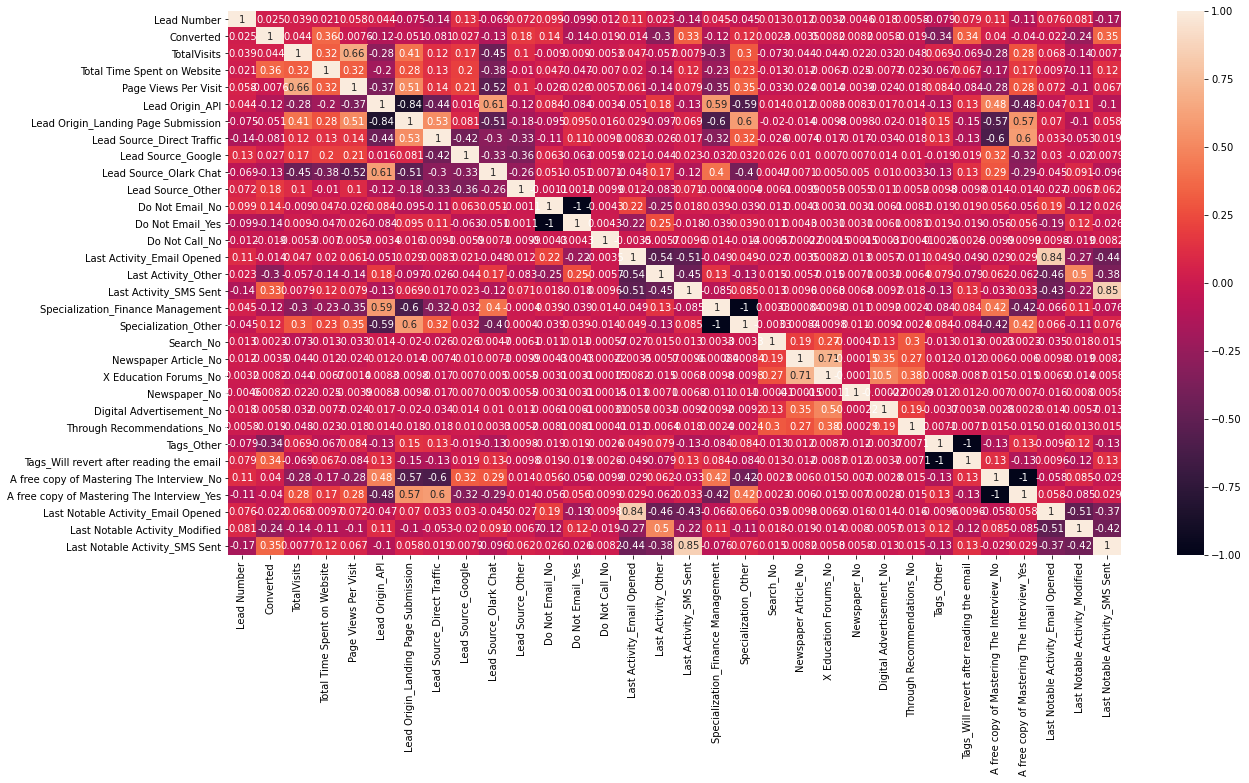

In [56]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

In [57]:
lead_data.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Last Activity_Email Opened,Last Activity_Other,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Other,Search_No,Newspaper Article_No,X Education Forums_No,Newspaper_No,Digital Advertisement_No,Through Recommendations_No,Tags_Other,Tags_Will revert after reading the email,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
Lead Number,1.000000,0.025157,0.038873,0.020762,0.057935,0.044136,-0.075012,-0.143405,0.131736,-0.068590,0.071864,0.098529,-0.098529,-0.011913,0.107735,0.022840,-0.137925,0.044516,-0.044516,0.012777,0.012294,0.003154,-0.004597,0.017713,0.005777,-0.078726,0.078726,0.109696,-0.109696,0.076414,0.080591,-0.169987
Converted,0.025157,1.000000,0.043716,0.362497,-0.007604,-0.120822,-0.051236,-0.080682,0.027221,-0.129459,0.178902,0.135580,-0.135580,-0.018581,-0.013850,-0.304580,0.325600,-0.121951,0.121951,0.002261,-0.003465,0.008238,0.008238,0.005789,-0.018607,-0.339760,0.339760,0.039820,-0.039820,-0.021955,-0.244294,0.351845
TotalVisits,0.038873,0.043716,1.000000,0.324140,0.664980,-0.281352,0.408685,0.119074,0.170355,-0.446415,0.103324,-0.008974,0.008974,-0.005343,0.046929,-0.056689,0.007934,-0.302139,0.302139,-0.072753,-0.044084,-0.044061,-0.021502,-0.031730,-0.048379,0.068525,-0.068525,-0.280920,0.280920,0.067677,-0.143270,0.007747
Total Time Spent on Website,0.020762,0.362497,0.324140,1.000000,0.323477,-0.201024,0.275568,0.132469,0.199775,-0.376476,-0.010209,0.046663,-0.046663,-0.007041,0.020378,-0.135200,0.116311,-0.230820,0.230820,-0.013160,-0.011872,-0.006686,-0.024903,-0.007681,-0.023292,-0.067080,0.067080,-0.167626,0.167626,0.009669,-0.106312,0.124336
Page Views Per Visit,0.057935,-0.007604,0.664980,0.323477,1.000000,-0.366972,0.510366,0.142178,0.214876,-0.521775,0.099883,-0.025605,0.025605,0.005668,0.060840,-0.140753,0.078933,-0.349861,0.349861,-0.032880,-0.024123,0.001375,-0.003891,-0.023585,-0.018263,0.084019,-0.084019,-0.282227,0.282227,0.071808,-0.103025,0.067051
Lead Origin_API,0.044136,-0.120822,-0.281352,-0.201024,-0.366972,1.000000,-0.842492,-0.435365,0.015723,0.607716,-0.123561,0.084110,-0.084110,-0.003399,-0.050978,0.176282,-0.125686,0.585788,-0.585788,0.013846,0.011702,0.008274,0.008274,0.016551,0.013824,-0.129093,0.129093,0.475875,-0.475875,-0.047394,0.105432,-0.103486
Lead Origin_Landing Page Submission,-0.075012,-0.051236,0.408685,0.275568,0.510366,-0.842492,1.000000,0.528303,0.081450,-0.512950,-0.175000,-0.095304,0.095304,0.015587,0.028583,-0.096954,0.068547,-0.599114,0.599114,-0.020050,-0.013890,-0.009821,-0.009821,-0.019645,-0.018112,0.146055,-0.146055,-0.569633,0.569633,0.070159,-0.101822,0.057507
Lead Source_Direct Traffic,-0.143405,-0.080682,0.119074,0.132469,0.142178,-0.435365,0.528303,1.000000,-0.417180,-0.298384,-0.327800,-0.109314,0.109314,0.009067,0.008341,-0.025595,0.017250,-0.316910,0.316910,-0.025836,-0.007405,-0.016883,-0.016883,-0.033772,-0.018262,0.126511,-0.126511,-0.598655,0.598655,0.033109,-0.053070,0.018989
Lead Source_Google,0.131736,0.027221,0.170355,0.199775,0.214876,0.015723,0.081450,-0.417180,1.000000,-0.327818,-0.360136,0.062662,-0.062662,-0.005886,0.021305,-0.044343,0.022593,-0.031771,0.031771,0.026372,0.009961,0.007043,0.007043,0.014089,0.010168,-0.018940,0.018940,0.315671,-0.315671,0.030109,-0.020184,0.007901
Lead Source_Olark Chat,-0.068590,-0.129459,-0.446415,-0.376476,-0.521775,0.607716,-0.512950,-0.298384,-0.327818,1.000000,-0.257584,0.051436,-0.051436,0.007125,-0.047884,0.169036,-0.121584,0.398867,-0.398867,0.004675,0.007125,0.005038,0.005038,0.010077,0.003305,-0.132029,0.132029,0.293169,-0.293169,-0.044874,0.091439,-0.095999


In [58]:
# Dropping the highly co-related variables

lead_data = lead_data.drop(['Lead Origin_Landing Page Submission','Do Not Email_Yes','Specialization_Other','Tags_Other','A free copy of Mastering The Interview_No',
                       'Last Activity_SMS Sent','Last Activity_Email Opened','Page Views Per Visit','X Education Forums_No'], 1)

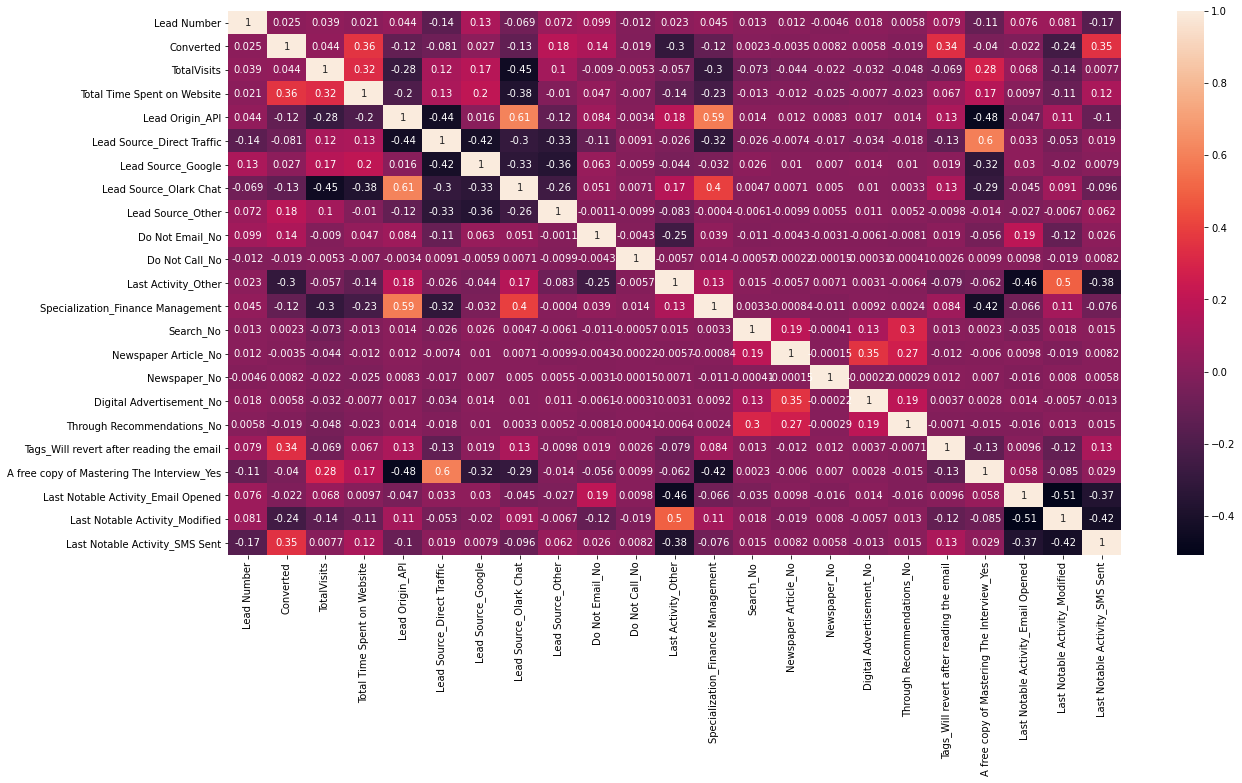

In [59]:
# Let's see the correlation matrix 

plt.figure(figsize = (20,10)) 
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

## 2. Test-Train split:

In [60]:
# Importing library

from sklearn.model_selection import train_test_split

In [61]:
# Putting feature variable to X

X = lead_data.drop(['Converted','Prospect ID','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,Do Not Email_No,Do Not Call_No,Last Activity_Other,Specialization_Finance Management,Search_No,Newspaper Article_No,Newspaper_No,Digital Advertisement_No,Through Recommendations_No,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0
1,5,11,1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0
2,2,26,0,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0
3,1,5,0,1,0,0,0,1,1,1,0,1,1,1,1,1,0,0,0,1,0
4,2,24,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0


In [62]:
# Putting the response variable to y

y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Splitting the data into train and test

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3,random_state = 100)

## 3. Feature Scaling:

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,Do Not Email_No,Do Not Call_No,Last Activity_Other,Specialization_Finance Management,Search_No,Newspaper Article_No,Newspaper_No,Digital Advertisement_No,Through Recommendations_No,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
1871,-1.022595,-0.884642,1,0,0,1,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0
6795,0.205373,-0.006837,0,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0
3516,0.512365,-0.665191,1,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0
8105,0.512365,1.309871,0,0,1,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,1
3934,-1.022595,-0.884642,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,0


In [66]:
### Checking the Conversion Rate
conversion = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
conversion

38.53896103896104

We have almost 39% conversion rate.

## 4. Model Building:

### a) Running the Training Model:

In [67]:
import statsmodels.api as sm

In [68]:
# Logistic Regression Model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial()) 
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2816.3
Date:                Fri, 12 Mar 2021   Deviance:                       5632.6
Time:                        22:00:23   Pearson chi2:                 7.13e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -15.3541   4.81e+04     -0.000      1.000   -9.44e+04    9.43e+04
TotalVisits                                   -0.1928      0.041     -4.725      0.000      -0.273      -0.113
Total Time Spent on Website                    0.9611      0.039     24.624      0.000       0.885       1.038
Lead Origin_API                               -0.6832      0.105     -6.512      0.000      -0.889      -0.478
Lead Source_Direct Traffic                    -4.3394    1.2e+04     -0.000      1.000   -2.36e+04    2.36e+04
Lead Source_Google                            -4.2684    1.2e+04     -0.000      1.000   -2.36e+04    2.36e+04
Lead Source_Olark Chat                        -3.6683    1.2e+04     -0.000      1.000   -2.36e+04    2.36e+04
Lead Source_Other                             -3.0780    1.2e+04     -0.000      1.000   -2.36e+04    2.36e+04
Do Not Email_No                                1.1894      0.157      7.594      0.000       0.882       1.496
Do Not Call_No                               -23.6347    2.8e+04     -0.001      0.999   -5.49e+04    5.48e+04
Last Activity_Other                           -1.3347      0.122    -10.985      0.000      -1.573      -1.097
Specialization_Finance Management             -0.4010      0.085     -4.697      0.000      -0.568      -0.234
Search_No                                     -0.4914      0.796     -0.617      0.537      -2.051       1.068
Newspaper Article_No                         -19.1720   2.27e+04     -0.001      0.999   -4.46e+04    4.45e+04
Newspaper_No                                  22.5178   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Digital Advertisement_No                      42.1505   3.21e+04      0.001      0.999   -6.29e+04     6.3e+04
Through Recommendations_No                    -3.2173      1.419     -2.267      0.023      -5.999      -0.436
Tags_Will revert after reading the email       1.8197      0.075     24.345      0.000       1.673       1.966
A free copy of Mastering The Interview_Yes    -0.6979      0.101     -6.890      0.000      -0.896      -0.499
Last Notable Activity_Email Opened            -1.2148      0.173     -7.007      0.000      -1.555      -0.875
Last Notable Activity_Modified                -1.0456      0.143     -7.314      0.000      -1.326      -0.765
Last Notable Activity_SMS Sent                 0.2151      0.177      1.214      0.225      -0.132       0.562
==============================================================================================================
"""

### b) Feature Selection Using RFE:

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False])

In [72]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_API', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Other', True, 1),
 ('Do Not Email_No', True, 1),
 ('Do Not Call_No', True, 1),
 ('Last Activity_Other', True, 1),
 ('Specialization_Finance Management', False, 3),
 ('Search_No', False, 4),
 ('Newspaper Article_No', False, 7),
 ('Newspaper_No', True, 1),
 ('Digital Advertisement_No', True, 1),
 ('Through Recommendations_No', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('A free copy of Mastering The Interview_Yes', True, 1),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_SMS Sent', False, 2)]

In [73]:
col = X_train.columns[rfe.support_]

In [74]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead Source_Olark Chat',
       'Specialization_Finance Management', 'Search_No',
       'Newspaper Article_No', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### c) Assessing the model with StatsModels:

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2838.5
Date:                Fri, 12 Mar 2021   Deviance:                       5676.9
Time:                        22:00:24   Pearson chi2:                 6.92e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -20.0878   6.04e+04     -0.000      1.000   -1.18e+05    1.18e+05
Total Time Spent on Website                    0.9456      0.038     24.665      0.000       0.870       1.021
Lead Origin_API                               -0.8857      0.096     -9.237      0.000      -1.074      -0.698
Lead Source_Direct Traffic                    -0.7998      0.149     -5.372      0.000      -1.092      -0.508
Lead Source_Google                            -0.7632      0.122     -6.259      0.000      -1.002      -0.524
Lead Source_Other                              0.3981      0.126      3.162      0.002       0.151       0.645
Do Not Email_No                                1.1772      0.156      7.559      0.000       0.872       1.482
Do Not Call_No                               -23.9452   2.65e+04     -0.001      0.999    -5.2e+04     5.2e+04
Last Activity_Other                           -1.4851      0.090    -16.552      0.000      -1.661      -1.309
Newspaper_No                                  23.1806   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Digital Advertisement_No                      23.2263   2.48e+04      0.001      0.999   -4.86e+04    4.86e+04
Through Recommendations_No                    -3.0291      1.364     -2.221      0.026      -5.702      -0.356
Tags_Will revert after reading the email       1.8178      0.074     24.451      0.000       1.672       1.964
A free copy of Mastering The Interview_Yes    -0.7053      0.096     -7.339      0.000      -0.894      -0.517
Last Notable Activity_Email Opened            -1.3840      0.084    -16.457      0.000      -1.549      -1.219
Last Notable Activity_Modified                -1.1496      0.084    -13.633      0.000      -1.315      -0.984
==============================================================================================================
"""

In [76]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.070163
6795    0.364537
3516    0.084969
8105    0.730576
3934    0.370048
4844    0.964344
3297    0.129887
8071    0.126911
987     0.458505
7423    0.927722
dtype: float64

In [77]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0701631 , 0.36453748, 0.08496937, 0.73057587, 0.37004805,
       0.96434365, 0.12988654, 0.12691139, 0.45850516, 0.92772199])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [78]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob_Score':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob_Score,Prospect ID
0,0,0.070163,1871
1,0,0.364537,6795
2,0,0.084969,3516
3,0,0.730576,8105
4,0,0.370048,3934


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [79]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob_Score.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Converted,Converted_Prob_Score,Prospect ID,predicted
0,0,0.070163,1871,0
1,0,0.364537,6795,0
2,0,0.084969,3516,0
3,0,0.730576,8105,1
4,0,0.370048,3934,0
5,1,0.964344,4844,1
6,0,0.129887,3297,0
7,1,0.126911,8071,0
8,0,0.458505,987,0
9,1,0.927722,7423,1


In [80]:
from sklearn import metrics

In [81]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3517  485]
 [ 739 1727]]


In [82]:
# Predicted     not_churn    churn
# Actual
# not_churn        3517      485
# churn            739       1727  

In [83]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8107606679035251


In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Newspaper_No,3080.78
6,Do Not Call_No,2387.46
9,Digital Advertisement_No,1962.08
10,Through Recommendations_No,938.11
5,Do Not Email_No,14.12
2,Lead Source_Direct Traffic,5.27
3,Lead Source_Google,4.11
4,Lead Source_Other,3.27
1,Lead Origin_API,3.21
11,Tags_Will revert after reading the email,2.59


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Newspaper_No' has the highest VIF. So let's start by dropping that.

In [86]:
# Let's drop 'Newspaper_No' since it has a high VIF

col = col.drop('Newspaper_No', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Other',
       'Do Not Email_No', 'Do Not Call_No', 'Last Activity_Other',
       'Digital Advertisement_No', 'Through Recommendations_No',
       'Tags_Will revert after reading the email',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

In [87]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2839.5
Date:                Fri, 12 Mar 2021   Deviance:                       5679.0
Time:                        22:00:24   Pearson chi2:                 6.91e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          3.0920   3.63e+04   8.51e-05      1.000   -7.12e+04    7.12e+04
Total Time Spent on Website                    0.9436      0.038     24.644      0.000       0.869       1.019
Lead Origin_API                               -0.8839      0.096     -9.222      0.000      -1.072      -0.696
Lead Source_Direct Traffic                    -0.8020      0.149     -5.387      0.000      -1.094      -0.510
Lead Source_Google                            -0.7597      0.122     -6.233      0.000      -0.999      -0.521
Lead Source_Other                              0.3997      0.126      3.175      0.001       0.153       0.646
Do Not Email_No                                1.1766      0.156      7.556      0.000       0.871       1.482
Do Not Call_No                               -23.9458   2.65e+04     -0.001      0.999    -5.2e+04     5.2e+04
Last Activity_Other                           -1.4851      0.090    -16.555      0.000      -1.661      -1.309
Digital Advertisement_No                      23.2261   2.48e+04      0.001      0.999   -4.86e+04    4.86e+04
Through Recommendations_No                    -3.0313      1.364     -2.223      0.026      -5.704      -0.359
Tags_Will revert after reading the email       1.8195      0.074     24.475      0.000       1.674       1.965
A free copy of Mastering The Interview_Yes    -0.6999      0.096     -7.291      0.000      -0.888      -0.512
Last Notable Activity_Email Opened            -1.3859      0.084    -16.482      0.000      -1.551      -1.221
Last Notable Activity_Modified                -1.1491      0.084    -13.630      0.000      -1.314      -0.984
==============================================================================================================
"""

In [88]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [89]:
y_train_pred[:10]

array([0.06997768, 0.3641826 , 0.08471338, 0.72984442, 0.37035104,
       0.96403815, 0.13013748, 0.1266992 , 0.45843619, 0.9276131 ])

In [90]:
y_train_pred_final['Converted_Prob_Score'] = y_train_pred

In [91]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob_Score.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob_Score,Prospect ID,predicted
0,0,0.069978,1871,0
1,0,0.364183,6795,0
2,0,0.084713,3516,0
3,0,0.729844,8105,1
4,0,0.370351,3934,0


In [92]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8107606679035251


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [93]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Digital Advertisement_No,1624.89
6,Do Not Call_No,1449.28
9,Through Recommendations_No,900.82
5,Do Not Email_No,14.09
2,Lead Source_Direct Traffic,5.26
3,Lead Source_Google,4.11
4,Lead Source_Other,3.26
1,Lead Origin_API,3.21
10,Tags_Will revert after reading the email,2.59
11,A free copy of Mastering The Interview_Yes,2.59


In [94]:
# Let's drop 'Digital Advertisement_No'  since it has a high VIF
col = col.drop('Digital Advertisement_No')
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Other',
       'Do Not Email_No', 'Do Not Call_No', 'Last Activity_Other',
       'Through Recommendations_No',
       'Tags_Will revert after reading the email',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

In [95]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2841.7
Date:                Fri, 12 Mar 2021   Deviance:                       5683.5
Time:                        22:00:25   Pearson chi2:                 6.92e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         24.1043   1.61e+04      0.001      0.999   -3.15e+04    3.16e+04
Total Time Spent on Website                    0.9432      0.038     24.650      0.000       0.868       1.018
Lead Origin_API                               -0.8825      0.096     -9.209      0.000      -1.070      -0.695
Lead Source_Direct Traffic                    -0.8070      0.149     -5.424      0.000      -1.099      -0.515
Lead Source_Google                            -0.7593      0.122     -6.231      0.000      -0.998      -0.520
Lead Source_Other                              0.3993      0.126      3.172      0.002       0.153       0.646
Do Not Email_No                                1.1732      0.156      7.535      0.000       0.868       1.478
Do Not Call_No                               -22.9482   1.61e+04     -0.001      0.999   -3.16e+04    3.15e+04
Last Activity_Other                           -1.4865      0.090    -16.569      0.000      -1.662      -1.311
Through Recommendations_No                    -1.8132      1.175     -1.543      0.123      -4.116       0.489
Tags_Will revert after reading the email       1.8182      0.074     24.483      0.000       1.673       1.964
A free copy of Mastering The Interview_Yes    -0.6960      0.096     -7.261      0.000      -0.884      -0.508
Last Notable Activity_Email Opened            -1.3823      0.084    -16.453      0.000      -1.547      -1.218
Last Notable Activity_Modified                -1.1492      0.084    -13.637      0.000      -1.314      -0.984
==============================================================================================================
"""

In [96]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [97]:
y_train_pred[:10]

array([0.07024022, 0.36413924, 0.0850192 , 0.72954498, 0.37010528,
       0.96374399, 0.13081657, 0.12634258, 0.45757336, 0.92750036])

In [98]:
y_train_pred_final['Converted_Prob_Score'] = y_train_pred

In [99]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob_Score.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob_Score,Prospect ID,predicted
0,0,0.070240,1871,0
1,0,0.364139,6795,0
2,0,0.085019,3516,0
3,0,0.729545,8105,1
4,0,0.370105,3934,0


In [100]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8104514533085961


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Do Not Call_No,740.87
8,Through Recommendations_No,722.02
5,Do Not Email_No,14.08
2,Lead Source_Direct Traffic,5.26
3,Lead Source_Google,4.10
4,Lead Source_Other,3.26
1,Lead Origin_API,3.21
10,A free copy of Mastering The Interview_Yes,2.59
9,Tags_Will revert after reading the email,2.58
12,Last Notable Activity_Modified,2.47


In [102]:
# Let's drop 'Do Not Call_No' since it has a high VIF
col = col.drop('Do Not Call_No')
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Other',
       'Do Not Email_No', 'Last Activity_Other', 'Through Recommendations_No',
       'Tags_Will revert after reading the email',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

In [103]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.6
Date:                Fri, 12 Mar 2021   Deviance:                       5689.2
Time:                        22:00:25   Pearson chi2:                 6.92e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.1513      1.196      0.963      0.336      -1.192       3.495
Total Time Spent on Website                    0.9424      0.038     24.647      0.000       0.867       1.017
Lead Origin_API                               -0.8837      0.096     -9.228      0.000      -1.071      -0.696
Lead Source_Direct Traffic                    -0.8054      0.149     -5.416      0.000      -1.097      -0.514
Lead Source_Google                            -0.7581      0.122     -6.225      0.000      -0.997      -0.519
Lead Source_Other                              0.4034      0.126      3.206      0.001       0.157       0.650
Do Not Email_No                                1.1763      0.156      7.557      0.000       0.871       1.481
Last Activity_Other                           -1.4822      0.090    -16.540      0.000      -1.658      -1.307
Through Recommendations_No                    -1.8111      1.175     -1.541      0.123      -4.114       0.492
Tags_Will revert after reading the email       1.8154      0.074     24.465      0.000       1.670       1.961
A free copy of Mastering The Interview_Yes    -0.6983      0.096     -7.287      0.000      -0.886      -0.511
Last Notable Activity_Email Opened            -1.3811      0.084    -16.444      0.000      -1.546      -1.217
Last Notable Activity_Modified                -1.1460      0.084    -13.609      0.000      -1.311      -0.981
==============================================================================================================
"""

In [104]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [105]:
y_train_pred[:10]

array([0.07030465, 0.36368111, 0.0850822 , 0.72962591, 0.37017083,
       0.96366102, 0.1312588 , 0.12767797, 0.45941327, 0.92722781])

In [106]:
y_train_pred_final['Converted_Prob_Score'] = y_train_pred

In [107]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob_Score.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob_Score,Prospect ID,predicted
0,0,0.070305,1871,0
1,0,0.363681,6795,0
2,0,0.085082,3516,0
3,0,0.729626,8105,1
4,0,0.370171,3934,0


In [108]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8102968460111317


The accuracy is still practically the same.


##### Let's now check the VIFs again

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Through Recommendations_No,33.38
5,Do Not Email_No,13.89
2,Lead Source_Direct Traffic,5.22
3,Lead Source_Google,4.08
4,Lead Source_Other,3.24
1,Lead Origin_API,3.20
9,A free copy of Mastering The Interview_Yes,2.59
8,Tags_Will revert after reading the email,2.57
11,Last Notable Activity_Modified,2.47
6,Last Activity_Other,2.30


In [110]:
# Let's drop 'Through Recommendations_No' since it has a high VIF
col = col.drop('Through Recommendations_No')
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Other',
       'Do Not Email_No', 'Last Activity_Other',
       'Tags_Will revert after reading the email',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

In [111]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.8
Date:                Fri, 12 Mar 2021   Deviance:                       5691.6
Time:                        22:00:25   Pearson chi2:                 6.93e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.6629      0.208     -3.182      0.001      -1.071      -0.255
Total Time Spent on Website                    0.9427      0.038     24.672      0.000       0.868       1.018
Lead Origin_API                               -0.8852      0.096     -9.246      0.000      -1.073      -0.698
Lead Source_Direct Traffic                    -0.8020      0.149     -5.398      0.000      -1.093      -0.511
Lead Source_Google                            -0.7588      0.122     -6.233      0.000      -0.997      -0.520
Lead Source_Other                              0.4028      0.126      3.203      0.001       0.156       0.649
Do Not Email_No                                1.1793      0.156      7.579      0.000       0.874       1.484
Last Activity_Other                           -1.4781      0.090    -16.513      0.000      -1.654      -1.303
Tags_Will revert after reading the email       1.8160      0.074     24.474      0.000       1.671       1.961
A free copy of Mastering The Interview_Yes    -0.6985      0.096     -7.294      0.000      -0.886      -0.511
Last Notable Activity_Email Opened            -1.3795      0.084    -16.428      0.000      -1.544      -1.215
Last Notable Activity_Modified                -1.1461      0.084    -13.617      0.000      -1.311      -0.981
==============================================================================================================
"""

In [112]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [113]:
y_train_pred[:10]

array([0.07028123, 0.36491448, 0.0850604 , 0.72956235, 0.36982766,
       0.96381961, 0.13131235, 0.12803442, 0.4600547 , 0.92715932])

In [114]:
y_train_pred_final['Coverted_Prob_Score'] = y_train_pred

In [115]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob_Score.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob_Score,Prospect ID,predicted,Coverted_Prob_Score
0,0,0.070305,1871,0,0.070281
1,0,0.363681,6795,0,0.364914
2,0,0.085082,3516,0,0.085060
3,0,0.729626,8105,1,0.729562
4,0,0.370171,3934,0,0.369828


In [116]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8102968460111317


##### Let's now check the VIFs again

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Do Not Email_No,8.14
2,Lead Source_Direct Traffic,3.60
3,Lead Source_Google,2.73
1,Lead Origin_API,2.64
8,A free copy of Mastering The Interview_Yes,2.54
10,Last Notable Activity_Modified,2.39
7,Tags_Will revert after reading the email,2.31
4,Lead Source_Other,2.20
6,Last Activity_Other,2.15
9,Last Notable Activity_Email Opened,2.07


In [118]:
# Let's drop 'Do Not Email_No' since it has a high VIF
col = col.drop('Do Not Email_No')
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Other',
       'Last Activity_Other', 'Tags_Will revert after reading the email',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

In [119]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.0
Date:                Fri, 12 Mar 2021   Deviance:                       5755.9
Time:                        22:00:25   Pearson chi2:                 7.01e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.4691      0.145      3.233      0.001       0.185       0.754
Total Time Spent on Website                    0.9450      0.038     24.870      0.000       0.871       1.019
Lead Origin_API                               -0.8397      0.095     -8.824      0.000      -1.026      -0.653
Lead Source_Direct Traffic                    -0.8731      0.147     -5.922      0.000      -1.162      -0.584
Lead Source_Google                            -0.7706      0.122     -6.339      0.000      -1.009      -0.532
Lead Source_Other                              0.3524      0.125      2.812      0.005       0.107       0.598
Last Activity_Other                           -1.6096      0.088    -18.293      0.000      -1.782      -1.437
Tags_Will revert after reading the email       1.7883      0.074     24.325      0.000       1.644       1.932
A free copy of Mastering The Interview_Yes    -0.6700      0.094     -7.098      0.000      -0.855      -0.485
Last Notable Activity_Email Opened            -1.3079      0.083    -15.804      0.000      -1.470      -1.146
Last Notable Activity_Modified                -1.1233      0.083    -13.466      0.000      -1.287      -0.960
==============================================================================================================
"""

In [120]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [121]:
y_train_pred[:10]

array([0.07485253, 0.35435791, 0.09054092, 0.71837779, 0.36784606,
       0.95854093, 0.13139756, 0.10667318, 0.41411148, 0.92464729])

In [122]:
y_train_pred_final['Converted_Prob_Score'] = y_train_pred

In [123]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob_Score.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob_Score,Prospect ID,predicted,Coverted_Prob_Score
0,0,0.074853,1871,0,0.070281
1,0,0.354358,6795,0,0.364914
2,0,0.090541,3516,0,0.085060
3,0,0.718378,8105,1,0.729562
4,0,0.367846,3934,0,0.369828


In [124]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8110698824984539


##### Let's now check the VIFs again

In [125]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Direct Traffic,2.83
7,A free copy of Mastering The Interview_Yes,2.48
9,Last Notable Activity_Modified,2.31
6,Tags_Will revert after reading the email,2.17
5,Last Activity_Other,2.15
1,Lead Origin_API,2.03
8,Last Notable Activity_Email Opened,1.93
3,Lead Source_Google,1.84
4,Lead Source_Other,1.59
0,Total Time Spent on Website,1.17


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [126]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3521,  481],
       [ 741, 1725]], dtype=int64)

In [127]:
# Actual/Predicted     not_churn    churn
        # not_churn        3521      481
        # churn            741       1725  

In [128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8110698824984539

### d)  Metrics beyond simply accuracy:

In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6995133819951338

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.8798100949525237

In [132]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12018990504747626


In [133]:
# positive predictive value 
print (TP / float(TP+FP))

0.7819582955575702


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8261379633974659


### e) Plotting the ROC Curve:

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob_Score, drop_intermediate = False )

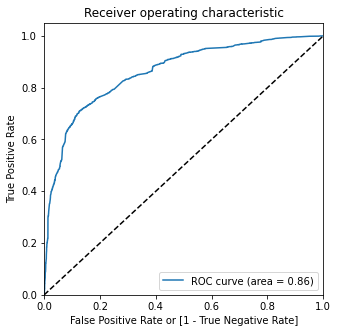

In [137]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob_Score)

### f) Finding Optimal Cutoff Point:

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [138]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob_Score,Prospect ID,predicted,Coverted_Prob_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.074853,1871,0,0.070281,1,0,0,0,0,0,0,0,0,0
1,0,0.354358,6795,0,0.364914,1,1,1,1,0,0,0,0,0,0
2,0,0.090541,3516,0,0.085060,1,0,0,0,0,0,0,0,0,0
3,0,0.718378,8105,1,0.729562,1,1,1,1,1,1,1,1,0,0
4,0,0.367846,3934,0,0.369828,1,1,1,1,0,0,0,0,0,0


In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.575912  0.957826  0.340580
0.2   0.2  0.690322  0.909165  0.555472
0.3   0.3  0.747835  0.836172  0.693403
0.4   0.4  0.792981  0.749797  0.819590
0.5   0.5  0.811070  0.699513  0.879810
0.6   0.6  0.809060  0.632198  0.918041
0.7   0.7  0.769944  0.472830  0.953023
0.8   0.8  0.744589  0.364558  0.978761
0.9   0.9  0.673315  0.155718  0.992254


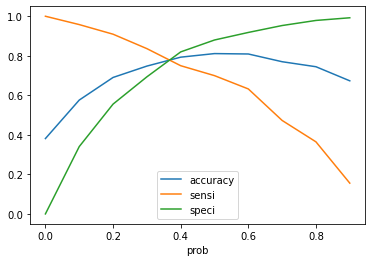

In [140]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob_Score.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob_Score,Prospect ID,predicted,Coverted_Prob_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.074853,1871,0,0.070281,1,0,0,0,0,0,0,0,0,0,0
1,0,0.354358,6795,0,0.364914,1,1,1,1,0,0,0,0,0,0,0
2,0,0.090541,3516,0,0.085060,1,0,0,0,0,0,0,0,0,0,0
3,0,0.718378,8105,1,0.729562,1,1,1,1,1,1,1,1,0,0,1
4,0,0.367846,3934,0,0.369828,1,1,1,1,0,0,0,0,0,0,1


In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7765924551638838

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3109,  893],
       [ 552, 1914]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7761557177615572

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.7768615692153923

In [147]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22313843078460768


In [148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6818667616672605


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.849221524173723


#### We got a high sensitivity on our test set which is a good indicator for our case study.

#### Example of Sensitivity:
##### Consider a hospital dealing  with diseased people
##### Sensitivity measures how often a test correctly generates a positive result for people who have the condition that’s being tested for (also known as the “true positive” rate). A test that’s highly sensitive will flag almost everyone who has the disease and not generate many false-negative results. (Example: a test with 90% sensitivity will correctly return a positive result for 90% of people who have the disease, but will return a negative result — a false-negative — for 10% of the people who have the disease and should have tested positive.)



### g) Precision and Recall:

In [150]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3521,  481],
       [ 741, 1725]], dtype=int64)

##### Precision
TP / TP + FP

In [151]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7819582955575702

##### Recall
TP / TP + FN

In [152]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6995133819951338

Using sklearn utilities for the same

In [153]:
from sklearn.metrics import precision_score, recall_score

In [154]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7819582955575702

In [155]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6995133819951338

### Precision and recall tradeoff

In [156]:
from sklearn.metrics import precision_recall_curve

In [157]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      1
 47      0
 48      0
 49      1
 50      0
 51      1
 52      1
 53      1
 54      1
 55      0
 56      1
 57      0
 58      1
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      1
 67      1
 68      0
 69      1
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      1
 77      0
 78      0
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      1
 89      1
 90      1

In [158]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob_Score)

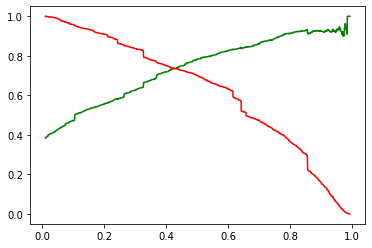

In [159]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### h) Making predictions on the test set

In [160]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website']])

In [161]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_API,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Other,Last Activity_Other,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified
4269,0.980694,1,1,0,0,0,1,0,0,0
2376,-0.884642,0,0,0,1,0,1,0,0,0
7766,-0.774916,1,0,1,0,1,1,0,0,0
9199,-0.884642,1,0,0,0,1,0,0,0,1
4359,-0.884642,0,0,0,1,0,1,0,1,0


In [162]:
X_test_sm = sm.add_constant(X_test)

In [163]:
y_test_pred = res.predict(X_test_sm)

In [164]:
y_test_pred[:10]

4269    0.813281
2376    0.854937
7766    0.155160
9199    0.019088
4359    0.614433
9186    0.843941
1631    0.751349
8963    0.253151
8007    0.188501
5324    0.723522
dtype: float64

In [165]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [166]:
# Let's see the head
y_pred_1.head()

,0
4269,0.813281
2376,0.854937
7766,0.155160
9199,0.019088
4359,0.614433


In [167]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [168]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [169]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [170]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [171]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.813281
1,1,2376,0.854937
2,1,7766,0.155160
3,0,9199,0.019088
4,1,4359,0.614433


In [172]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob_Score'})

In [173]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob_Score
0,1,4269,0.813281
1,1,2376,0.854937
2,1,7766,0.155160
3,0,9199,0.019088
4,1,4359,0.614433


In [174]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob_Score.map(lambda x: 1 if x > 0.42 else 0)

In [175]:
y_pred_final.head(15)

,Converted,Prospect ID,Converted_Prob_Score,final_predicted
0,1,4269,0.813281,1
1,1,2376,0.854937,1
2,1,7766,0.155160,0
3,0,9199,0.019088,0
4,1,4359,0.614433,1
5,1,9186,0.843941,1
6,1,1631,0.751349,1
7,1,8963,0.253151,0
8,0,8007,0.188501,0
9,1,5324,0.723522,1


In [176]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8041125541125541

In [177]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1415,  262],
       [ 281,  814]], dtype=int64)

In [178]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7433789954337899

In [180]:
# Let us calculate specificity
TN / float(TN+FP)

0.8437686344663089